# Music Recommendation System
One of the most used machine learning algorithms is recommendation systems. A recommender (or recommendation) system (or engine) is a filtering system which aim is to predict a rating or preference a user would give to an item, eg. a film, a product, a song, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Recommenders as Recommenders
from scipy.sparse import csr_matrix

In [2]:
data_1 = pd.read_csv('triplets_file.csv')

In [3]:
data_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
data_2 = pd.read_csv('song_data.csv')
data_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [5]:
data = pd.merge(data_1, data_2.drop_duplicates(['song_id']), on='song_id', how='left')
data.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [6]:
print(len(data_1), len(data_2))

2000000 1000000


In [7]:
len(data)

2000000

In [8]:
data['song'] = data['title']+' - '+data['artist_name']
data.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [9]:
data = data.head(10000)

In [10]:
song_grouped = data.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [11]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


# Music Recommendation based on the popularity

In [12]:
pr = Recommenders.popularity_recommender_py()

In [13]:
pr.create(data,'user_id', 'song')

In [14]:
pr.recommend(data['user_id'][5])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4378,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [15]:
pr.recommend(data['user_id'][100])

,user_id,song,score,Rank
3660,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,45,1.0
4678,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,32,2.0
5105,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,32,3.0
1071,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,28,5.0
4378,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,27,6.0
4712,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,27,7.0
3476,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,26,8.0
1387,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,24,9.0
1862,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


# Music Recommendation based on the similarity of item

In [16]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(data, 'user_id', 'song')

In [17]:
user_items = ir.get_user_items(data['user_id'][5])

In [18]:
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [19]:
ir.recommend(data['user_id'][5])

No. of unique songs for the user: 45
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :6844


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The End - Pearl Jam,0.037531,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,St. Elsewhere - Dave Grusin,0.037531,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Misled - Céline Dion,0.037531,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oil And Water - Incubus,0.037531,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.037531,10


In [20]:
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :75


,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,0.75,1
1,,St. Elsewhere - Dave Grusin,0.75,2
2,,Misled - Céline Dion,0.75,3
3,,Your Protector - Fleet Foxes,0.75,4
4,,Oil And Water - Incubus,0.75,5
5,,Tiger Mountain Peasant Song - Fleet Foxes,0.75,6
6,,Meadowlarks - Fleet Foxes,0.75,7
7,,Sun It Rises - Fleet Foxes,0.75,8
8,,Id Die Without You - P.M. Dawn,0.75,9
9,,Meet Virginia - Train,0.75,10


# Most popular songs

In [57]:
ten_popular_songs = data.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count', 'title'], ascending = [0,1])
ten_popular_songs['percentage']  = round(ten_popular_songs['listen_count'].div(ten_popular_songs['listen_count'].sum())*100, 2)

In [58]:
ten_popular_songs = ten_popular_songs[:10]
ten_popular_songs

,title,listen_count,percentage
3576,Sehr kosmisch,45,0.45
4995,You're The One,36,0.36
4577,Undo,32,0.32
1044,Dog Days Are Over (Radio Edit),28,0.28
3571,Secrets,28,0.28
4282,The Scientist,27,0.27
4611,Use Somebody,27,0.27
3399,Revelry,26,0.26
1355,Fireflies,24,0.24
1811,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,0.23


In [59]:
labels = ten_popular_songs['title'].tolist()
counts = ten_popular_songs['listen_count'].tolist()

<AxesSubplot:>

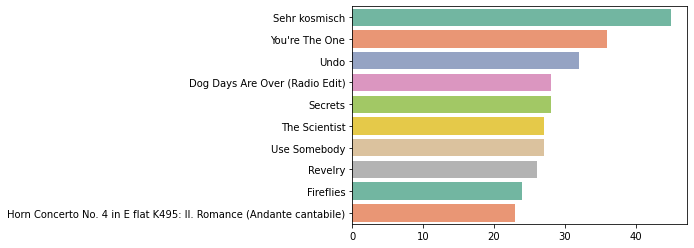

In [60]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set2')

# Most popular artist

In [61]:
ten_popular_artists  = data.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], ascending = [0,1])

In [62]:
ten_popular_artists = ten_popular_artists[:10]
ten_popular_artists

,artist_name,listen_count
383,Coldplay,173
431,Daft Punk,138
1681,The Black Keys,126
1731,The Killers,117
979,Kings Of Leon,108
659,Florence + The Machine,105
577,Eminem,80
1001,LCD Soundsystem,66
1292,OneRepublic,64
414,Cut Copy,62


<AxesSubplot:>

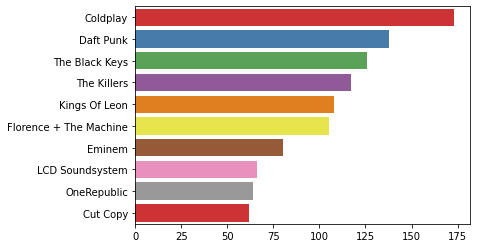

In [63]:
plt.figure()
labels = ten_popular_artists['artist_name'].tolist()
counts = ten_popular_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set1')

# Listen count

1. What is the maximum number of time a user listens to a particular song?

In [64]:
listen_counts = pd.DataFrame(data_1.groupby('listen_count').size(), columns=['count'])

In [65]:
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 2213


2. How many times on average the same user listen to a same song?

In [66]:
print(f"On average, a user listens to the same song {data_1['listen_count'].mean()} times")

On average, a user listens to the same song 3.0454845 times


The distribution of the listen_count is shown below

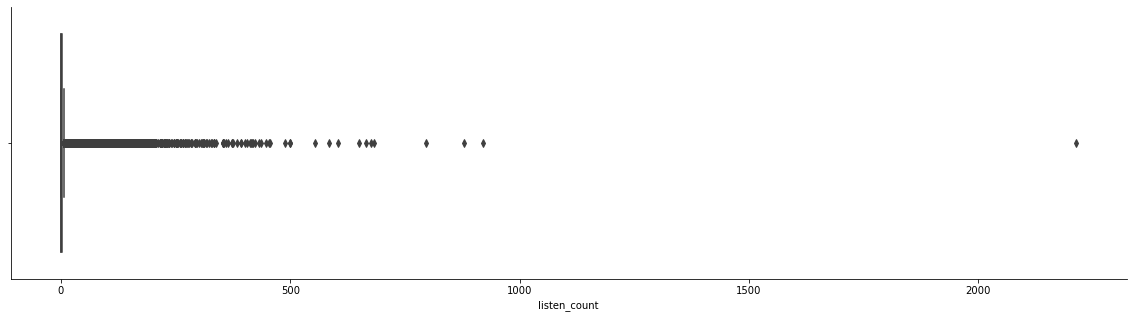

In [50]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='listen_count', data=data_1)
sns.despine()

3. What are the most frequent number of times a user listen to the same song?

In [67]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)

<AxesSubplot:xlabel='listen_count', ylabel='count'>

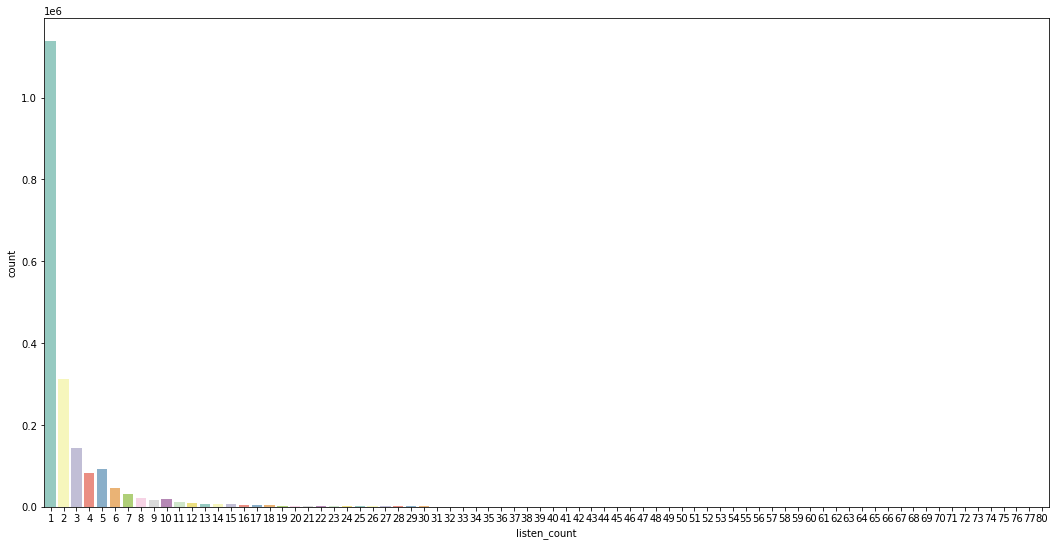

In [70]:
plt.figure(figsize=(18, 9))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts_temp)

4. How many songs does a user listen in average?

In [101]:
song_user = data_1.groupby('user_id')['song_id'].count()

C:\Users\preetham kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

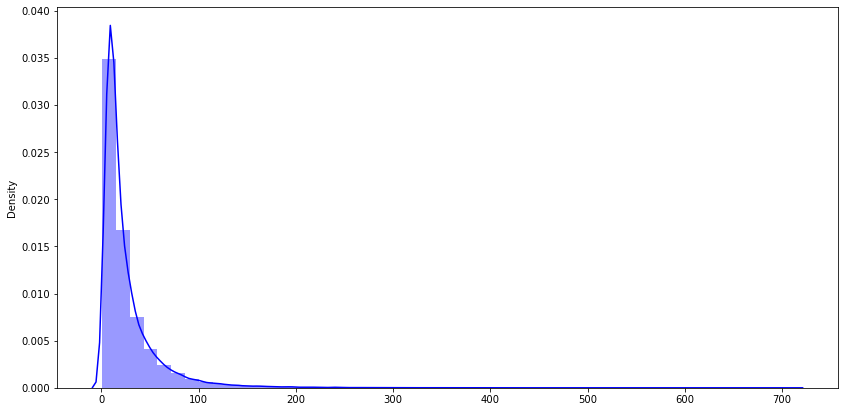

In [98]:
plt.figure(figsize=(14,7))
sns.distplot(song_user.values, color='blue')

In [99]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 26.194124657839247 songs


In [100]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 16.0 songs, with minimum 1 and maximum 711 songs


                                              **********END**********

BY: PREETHAM KUMAR D M